In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
data = pd.read_csv(r"C:\Users\titanic\train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = data.copy()

In [11]:
df['Age'].fillna(np.round(df['Age'].mean()),inplace=True)

In [16]:
df.drop('Cabin',axis=1,inplace=True)

In [17]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

<Axes: >

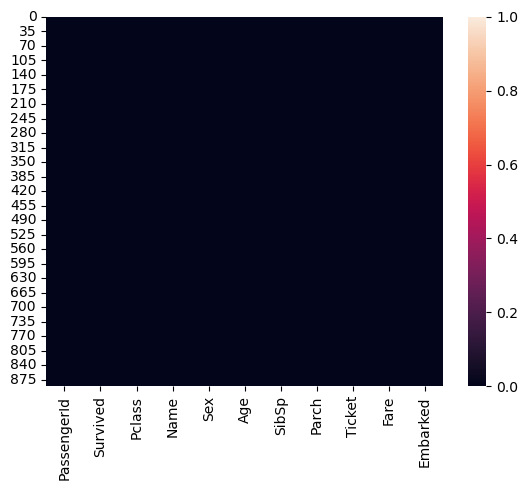

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.shape

(891, 11)

In [30]:
df['Ticket'] = df['Ticket'].apply(lambda x: int('0'+''.join(i for i in x if i.isdigit())))

In [31]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Embarked        object
dtype: object

In [34]:
df['Age'] = df['Age'].astype('int')

In [37]:
test_df = pd.read_csv(r"C:\Users\navab\Downloads\titanic\test.csv")

<Axes: >

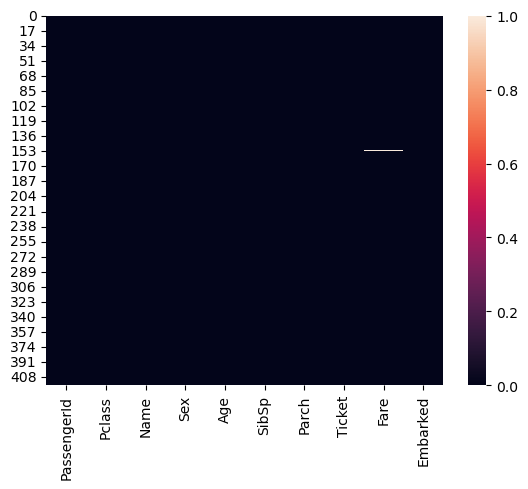

In [39]:
test_df['Age'].fillna(np.round(test_df['Age'].mean()),inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode(),inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)
sns.heatmap(test_df.isnull())

In [41]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [44]:
train_df = df.drop(['PassengerId','Survived'],axis=1)

In [47]:
test_df.drop('PassengerId',axis=1,inplace=True)
print(test_df.shape)
print(train_df.shape)

(418, 9)
(891, 9)


In [48]:
whole_df = pd.concat([train_df,test_df],axis=0)

In [49]:
whole_df.shape

(1309, 9)

In [51]:
whole_df.drop('Name',axis=1,inplace=True)

In [54]:
whole_df['Ticket'] = whole_df['Ticket'].apply(lambda x: int('0'+''.join(i for i in str(x) if i.isdigit())))

In [56]:
whole_df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Embarked     object
dtype: object

In [60]:
whole_df['Sex'] = whole_df['Sex'].astype('category')
whole_df['Embarked'] = whole_df['Embarked'].astype('category')

In [61]:
whole_df['Sex']=whole_df['Sex'].cat.codes
whole_df['Embarked'] = whole_df['Embarked'].cat.codes

In [62]:
whole_df.dtypes

Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Embarked       int8
dtype: object

<Axes: >

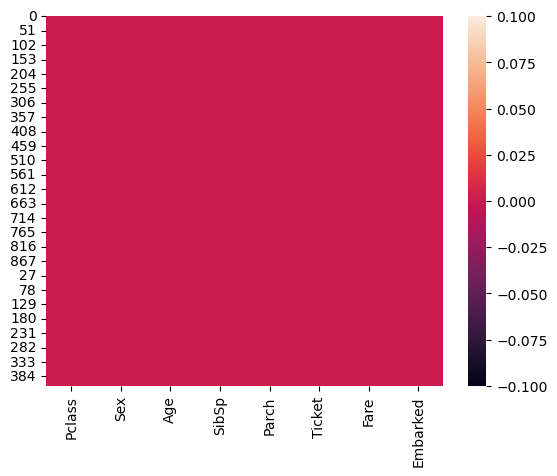

In [63]:
sns.heatmap(whole_df.isnull())

In [64]:
x_train = whole_df.iloc[:891,:]
y_test = whole_df.iloc[891:,:]

In [69]:
x_test = df['Survived']

(891,)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
rf = RandomForestClassifier(n_estimators=1800,bootstrap=False, max_depth=100, min_samples_leaf=4
)

In [172]:
rf.fit(x_train1,x_test)

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=4,
                       n_estimators=1800)

In [173]:
pred = rf.predict(y_test1)

In [174]:
prediction = pd.DataFrame(pred,columns=['Survived'])

In [113]:
sample = pd.read_csv(r"C:\Users\navab\Downloads\titanic\gender_submission.csv")

In [175]:
ind = sample['PassengerId']
result = pd.concat([ind,prediction],axis=1)

In [86]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
import pickle
pickle.dump(rf,open(file='TitanicModelTune.pkl',mode='wb'))

In [176]:
result.to_csv('SubmissionTunerfdataprep.csv',index=False)

# Another - Logistic Reg


In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(x_train,x_test)

LogisticRegression()

In [94]:
pred = rf.predict(y_test)
prediction = pd.DataFrame(pred,columns=['Survived'])
ind = sample['PassengerId']
result = pd.concat([ind,prediction],axis=1)
result.to_csv('Submission_Logistic.csv',index=False)

## accuracy ~ 76.684%

# fine tuning


In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [99]:
random = RandomizedSearchCV(rf,params)

In [101]:
random.fit(x_train,x_test)

C:\Users\navab\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\navab\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\navab\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [102]:
random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=4,
                       n_estimators=1800)

## Having ~ 77.777


# Lets Do some data preprocessing


In [118]:
x_train.corr()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,1.000000,0.131900,-0.329822,0.083081,0.018443,0.165069,-0.549500,0.173511
Sex,0.131900,1.000000,0.084241,-0.114631,-0.245489,0.044444,-0.182333,0.118492
Age,-0.329822,0.084241,1.000000,-0.232201,-0.180581,-0.038128,0.090782,-0.040432
SibSp,0.083081,-0.114631,-0.232201,1.000000,0.414838,-0.030224,0.159651,0.071480
Parch,0.018443,-0.245489,-0.180581,0.414838,1.000000,-0.069568,0.216225,0.043351
Ticket,0.165069,0.044444,-0.038128,-0.030224,-0.069568,1.000000,-0.093392,0.115321
Fare,-0.549500,-0.182333,0.090782,0.159651,0.216225,-0.093392,1.000000,-0.230365
Embarked,0.173511,0.118492,-0.040432,0.071480,0.043351,0.115321,-0.230365,1.000000


In [119]:
ticket = data['Ticket']

In [125]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [163]:
tf = TfidfVectorizer(max_features = 150)

In [166]:
matrix = pd.DataFrame(tf.fit_transform(ticket).toarray(),columns=idx)

In [167]:
x_train1 = pd.concat([x_train.drop('Ticket',axis=1),matrix],axis=1)

In [142]:
matrix.columns

RangeIndex(start=0, stop=695, step=1)

In [165]:
idx = [str(i) for i in range(0,150)]

In [168]:
tc = test_df['Ticket']

In [169]:
matrix1 = pd.DataFrame(tf.fit_transform(tc).toarray(),columns=idx)

In [170]:
matrix1.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '140', '141', '142', '143', '144', '145', '146', '147', '148', '149'],
      dtype='object', length=150)

In [171]:
y_test1 = pd.concat([y_test.drop('Ticket',axis=1),matrix1],axis=1)

# improved to ~ 78.222